In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('Base de Datos.csv', delimiter=';')

In [4]:
df.head()

,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,...,DC_SUP_SOST,HH_SUP_SOST,DC_SUBDIR,HH_SUBDIR,DC_PROF_ENC,HH_PROF_ENC,DC_EDUC_TRAD,HH_EDUC_TRAD,DC_TOT,HH_TOT
0,2023,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,0,0,0,0,0,0,0,0,71,2393
1,2023,2,7,PARVULARIO LAS ESPIGUITAS,15,AYP,151,15101,ARICA,151,...,0,0,0,0,0,0,0,0,15,530
2,2023,3,5,ESC. PEDRO VICENTE GUTIERREZ TORRES,15,AYP,151,15101,ARICA,151,...,0,0,0,0,0,0,0,0,27,1078
3,2023,4,3,LICEO OCTAVIO PALMA PEREZ,15,AYP,151,15101,ARICA,151,...,0,0,0,0,0,0,0,0,69,2727
4,2023,5,1,JOVINA NARANJO FERNANDEZ,15,AYP,151,15101,ARICA,151,...,0,0,0,0,0,0,0,0,63,2414


In [5]:
df.columns

Index(['AGNO', 'RBD', 'DGV_RBD', 'NOM_RBD', 'COD_REG_RBD', 'NOM_REG_RBD_A',
       'COD_PRO_RBD', 'COD_COM_RBD', 'NOM_COM_RBD', 'COD_DEPROV_RBD',
       'NOM_DEPROV_RBD', 'COD_DEPE', 'COD_DEPE2', 'RURAL_RBD', 'ESTADO_ESTAB',
       'DC_A', 'HH_A', 'DC_UTP', 'HH_UTP', 'DC_PDIR', 'HH_PDIR', 'DC_DIR',
       'HH_DIR', 'DC_OES', 'HH_OES', 'DC_OF', 'HH_OF', 'DC_JUTP', 'HH_JUTP',
       'DC_IG', 'HH_IG', 'DC_OR', 'HH_OR', 'DC_DIR_SOST', 'HH_DIR_SOST',
       'DC_TP_SOST', 'HH_TP_SOST', 'DC_SUP_SOST', 'HH_SUP_SOST', 'DC_SUBDIR',
       'HH_SUBDIR', 'DC_PROF_ENC', 'HH_PROF_ENC', 'DC_EDUC_TRAD',
       'HH_EDUC_TRAD', 'DC_TOT', 'HH_TOT'],
      dtype='object')

In [6]:
df.describe()

,AGNO,RBD,DGV_RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,COD_DEPROV_RBD,COD_DEPE,COD_DEPE2,RURAL_RBD,...,DC_SUP_SOST,HH_SUP_SOST,DC_SUBDIR,HH_SUBDIR,DC_PROF_ENC,HH_PROF_ENC,DC_EDUC_TRAD,HH_EDUC_TRAD,DC_TOT,HH_TOT
count,16654.0,16654.000000,16654.000000,16654.000000,16654.000000,16654.000000,16654.000000,16654.000000,16654.000000,16654.000000,...,16654.000000,16654.000000,16654.000000,16654.000000,16654.000000,16654.000000,16654.000000,16654.000000,16654.000000,16654.000000
mean,2023.0,13463.826768,4.508767,9.245407,94.462231,9452.490393,91.813919,2.813859,1.884532,0.295905,...,0.005764,0.213042,0.048397,2.024018,0.123394,5.352408,0.041852,1.162243,16.746607,625.700492
std,0.0,10676.369828,2.872668,3.813839,37.829669,3785.177284,36.277812,1.026080,0.928506,0.456462,...,0.082537,3.277349,0.249541,10.606641,0.328899,14.313592,0.275703,9.611569,23.108197,892.985992
min,2023.0,1.000000,0.000000,1.000000,11.000000,1101.000000,11.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023.0,5012.500000,2.000000,6.000000,61.000000,6116.000000,61.000000,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2023.0,10443.500000,5.000000,9.000000,91.000000,9117.000000,92.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,219.000000
75%,2023.0,20328.750000,7.000000,13.000000,131.000000,13119.000000,133.000000,3.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,950.000000
max,2023.0,42192.000000,9.000000,16.000000,163.000000,16305.000000,151.000000,6.000000,5.000000,1.000000,...,2.000000,88.000000,7.000000,289.000000,1.000000,44.000000,13.000000,548.000000,255.000000,11192.000000


In [7]:
df.isnull().sum()

AGNO               0
RBD                0
DGV_RBD            0
NOM_RBD           30
COD_REG_RBD        0
NOM_REG_RBD_A      0
COD_PRO_RBD        0
COD_COM_RBD        0
NOM_COM_RBD        0
COD_DEPROV_RBD     0
NOM_DEPROV_RBD     0
COD_DEPE           0
COD_DEPE2          0
RURAL_RBD          0
ESTADO_ESTAB       0
DC_A               0
HH_A               0
DC_UTP             0
HH_UTP             0
DC_PDIR            0
HH_PDIR            0
DC_DIR             0
HH_DIR             0
DC_OES             0
HH_OES             0
DC_OF              0
HH_OF              0
DC_JUTP            0
HH_JUTP            0
DC_IG              0
HH_IG              0
DC_OR              0
HH_OR              0
DC_DIR_SOST        0
HH_DIR_SOST        0
DC_TP_SOST         0
HH_TP_SOST         0
DC_SUP_SOST        0
HH_SUP_SOST        0
DC_SUBDIR          0
HH_SUBDIR          0
DC_PROF_ENC        0
HH_PROF_ENC        0
DC_EDUC_TRAD       0
HH_EDUC_TRAD       0
DC_TOT             0
HH_TOT             0
dtype: int64

**3.1 Pregunta 0 (descripción de variables)**

Con el objetivo de familiarizarse y entender mejor la base de datos, se requiere realizar un analisis de esta.

1. Generar un grafico por cada una de las variables. El grafico debe tener un tıtulo descriptivo y debe mostrar
informacion clara de la variable.

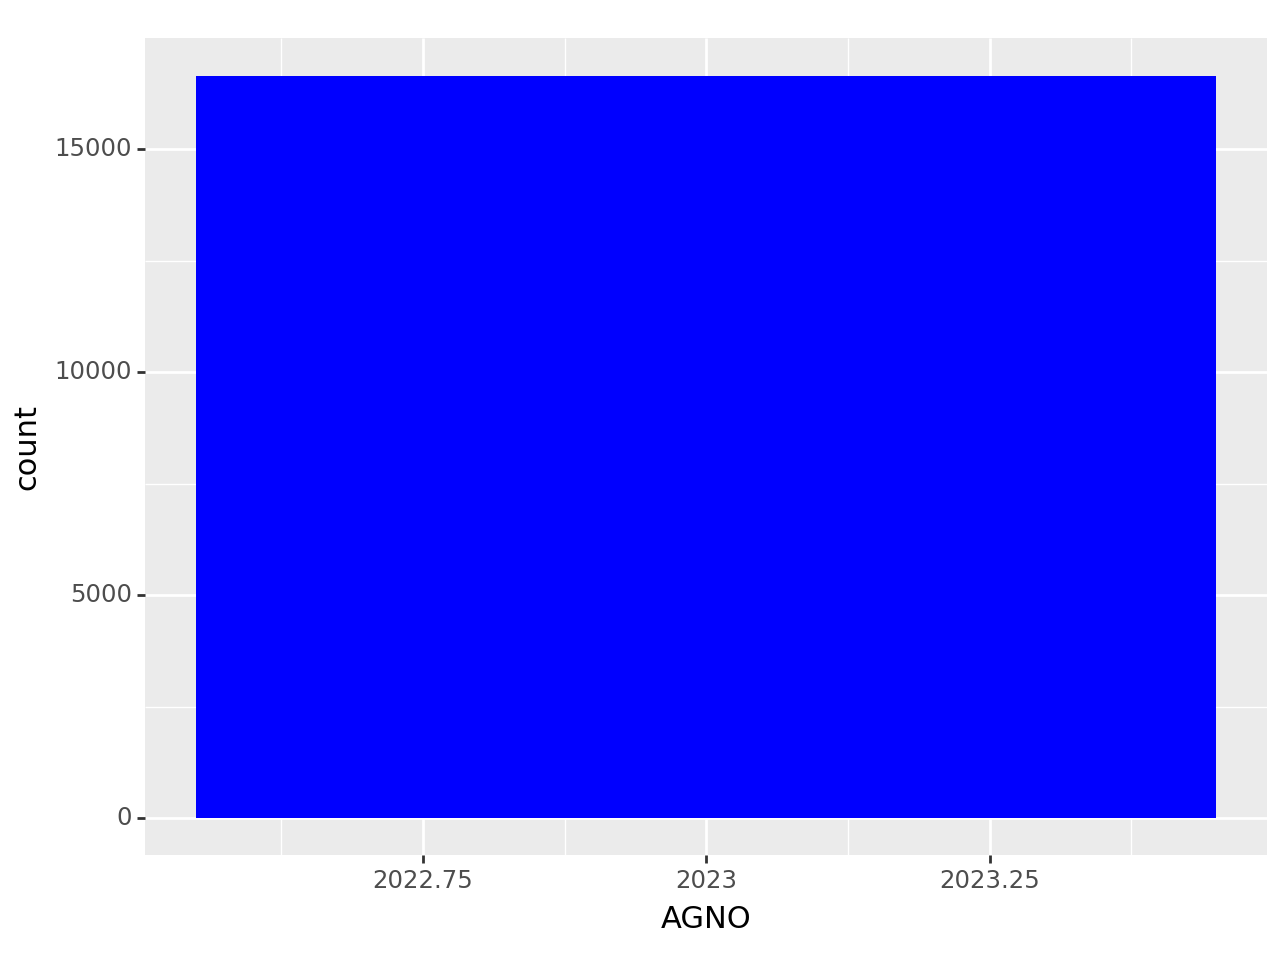

<Figure Size: (640 x 480)>

In [8]:
#1
(ggplot(df)+
 aes(x="AGNO",y="..count..")+
 geom_bar(fill="blue")
)

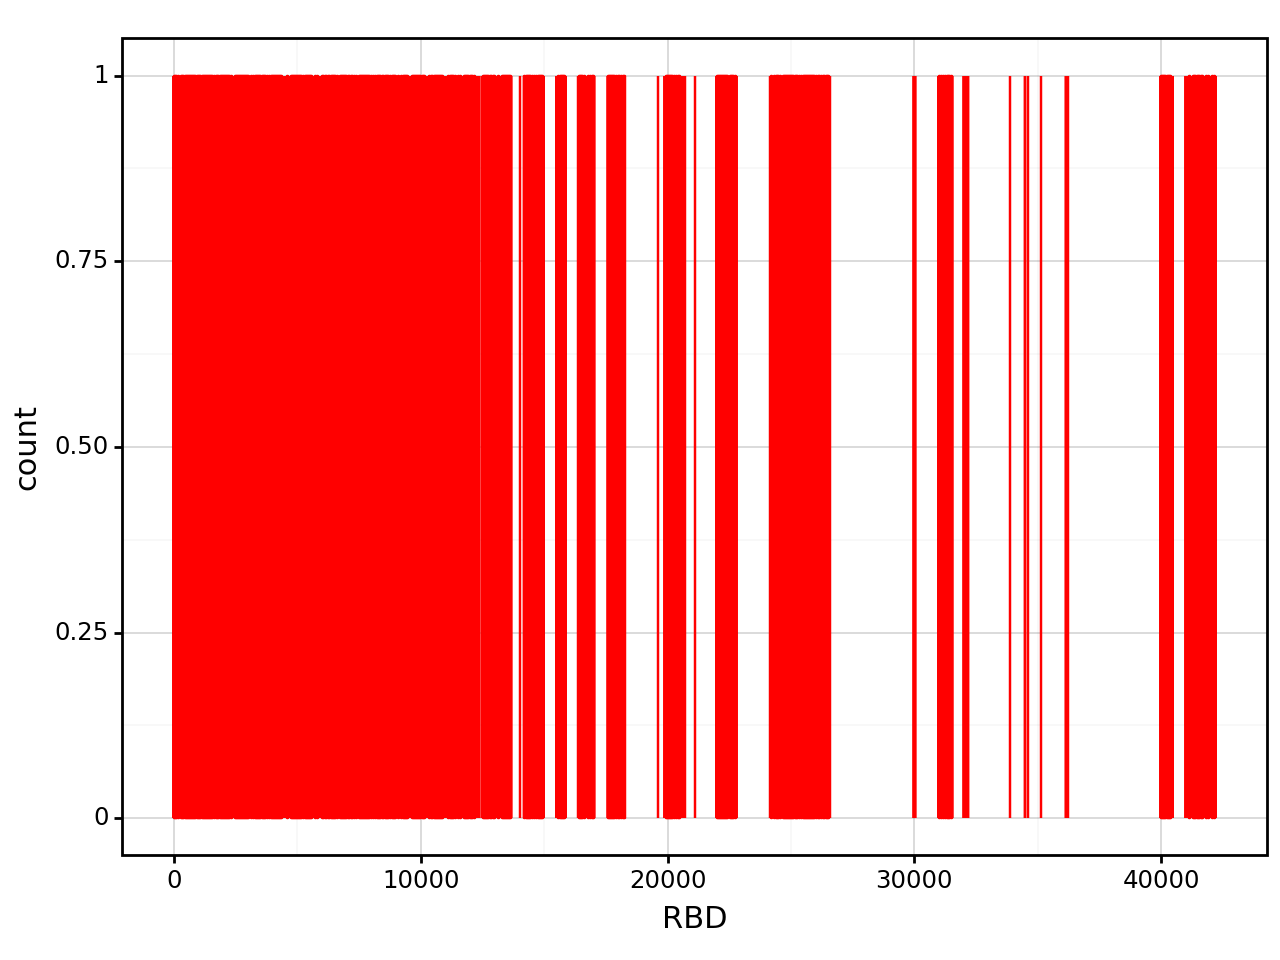

<Figure Size: (640 x 480)>

In [9]:
(ggplot(df)+
 aes(x="RBD")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

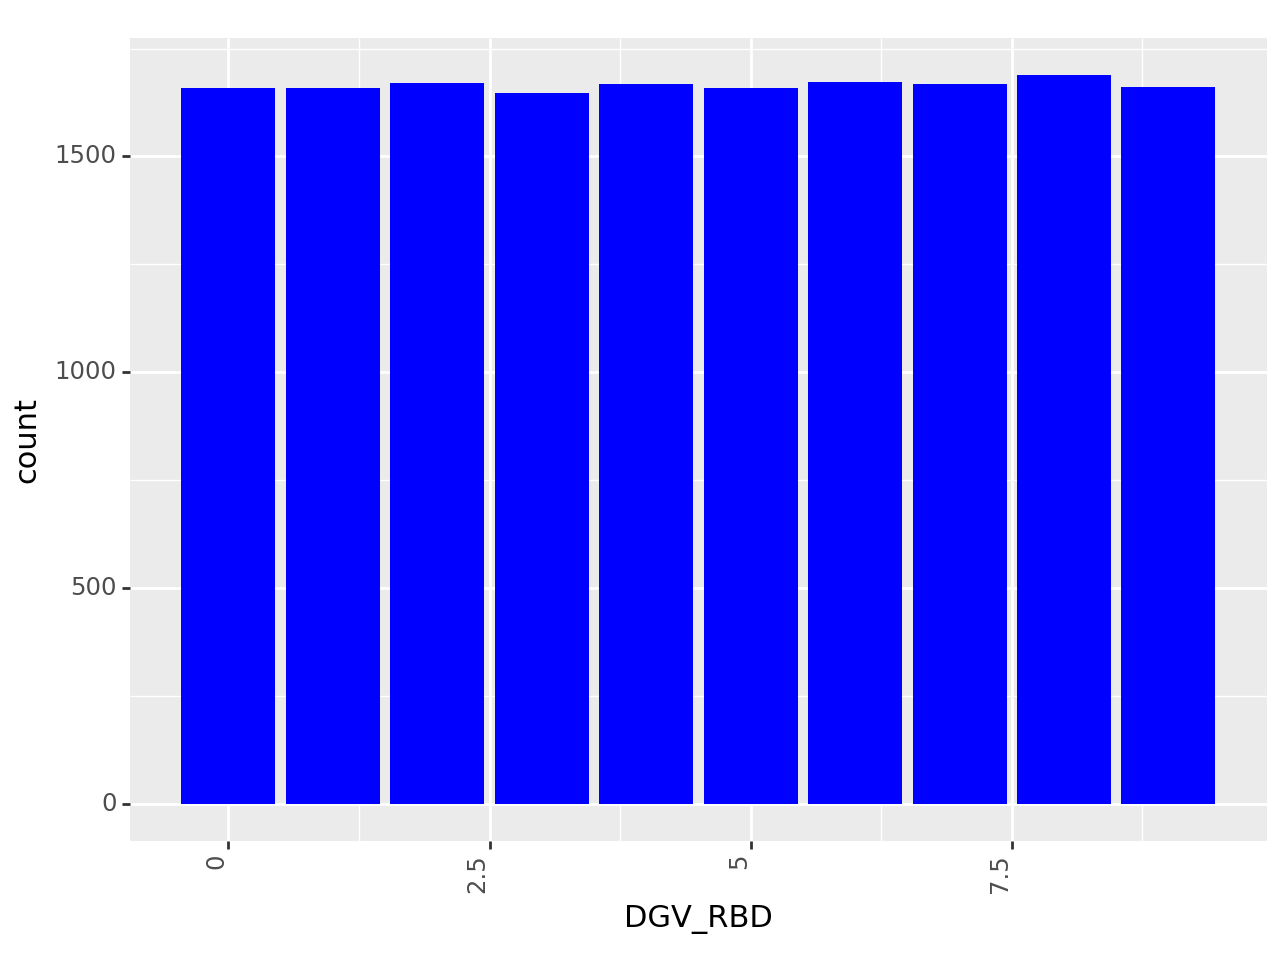

<Figure Size: (640 x 480)>

In [10]:
#3
(ggplot(df)+
 aes(x="DGV_RBD",y="..count..")+
 geom_bar(fill="blue")+
 theme(axis_text_x=element_text(angle=90,hjust=1)))


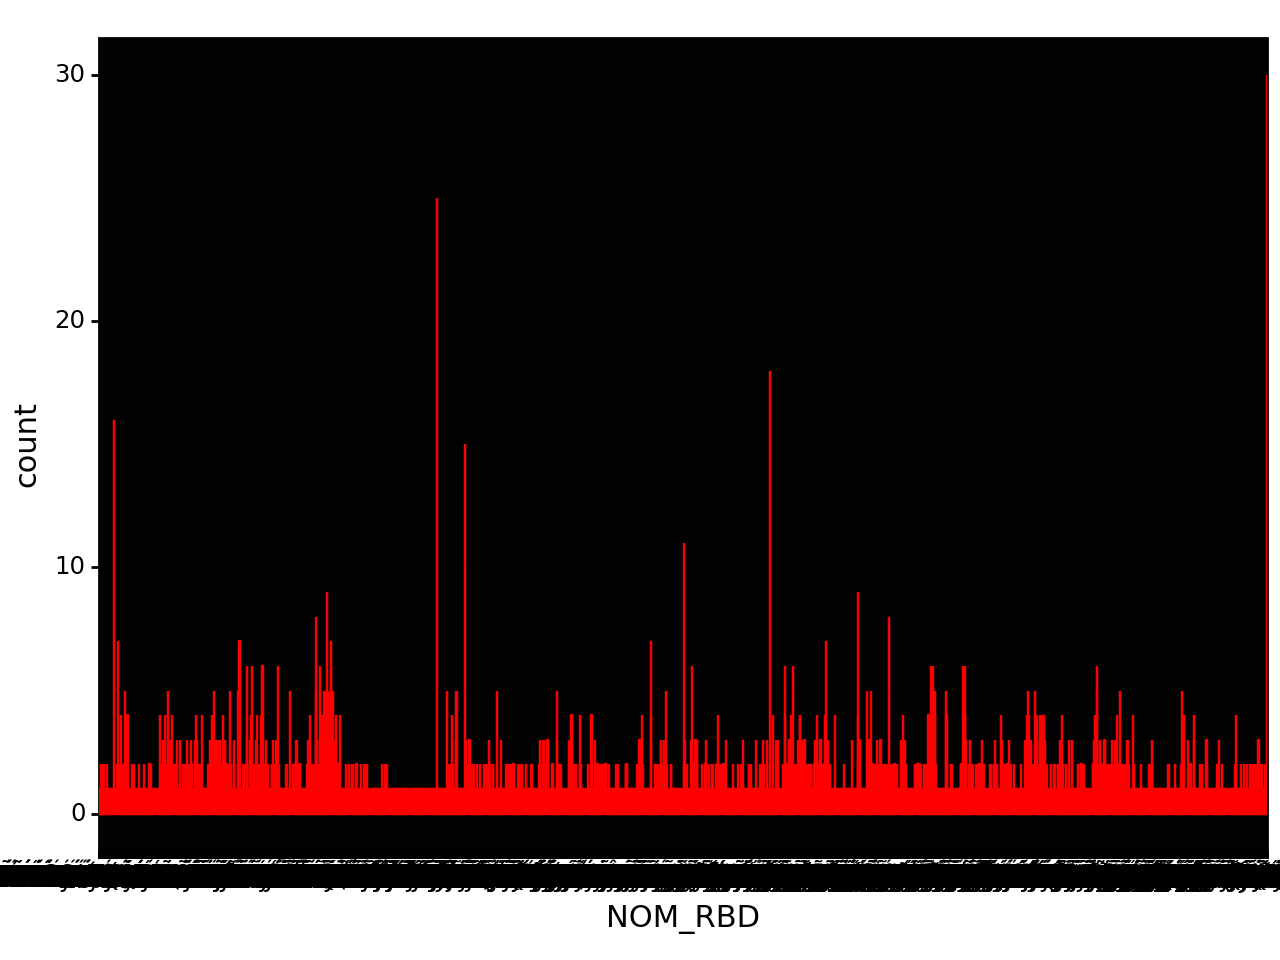

<Figure Size: (640 x 480)>

In [11]:
(ggplot(df)+
 aes(x="NOM_RBD")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

2. Se debe indicar por cada una de las variables su tipo (cuantitativa o cualitativa) justificando su decision. Se
debe recordar que el tipo de variable depende de su naturaleza, no del formato en el que se encuentre en la
base de datos.

**LAS VARIABLES SON DE TIPO:**

AGNO: XX

RBD: XX

DGV_RBD: XX


**3.2 Pregunta 1 (test de independencia)**

Los docentes UTP (Unidad Tecnico Pedagogica) en Chile son profesionales de la educacion encargados de la coordinacion pedagogica y tecnica en las instituciones educativas. Se dedican a la planificacion, evaluacion y seguimiento del rendimiento academico de los estudiantes, ofrecen apoyo y orientacion a otros docentes, participan en el desarrollo profesional y gestionan aspectos curriculares. Tambien mantienen comunicacion con los padres para informarles sobre el progreso de los estudiantes, desempeñando un papel fundamental en la mejora de la calidad educativa en
el paıs.

1. Obtenga un grafico apropiado que le permita estudiar la distribucion del numero de docentes pertenecientes a
la planta UTP en los establecimientos educacionales de sus regiones. Discuta las caracterısticas mas relevantes
presentes en sus graficos

2. Al Ministerio de Educacion le preocupa que existan diferencias en el numero de docentes UTP entre los distintos tipos de establecimientos (municipales, particulares subvencionados y particulares pagados). Implemente un test de independencia chi-cuadrado que le permita concluir si existe dependencia entre el tipo de establecimiento: (solo considere municipales, particulares subvencionados y particulares pagados) y el numero
de docentes UTP. En particular:

• Reporte la tabla de frecuencias observadas y esperadas.

• Reporte el p-valor obtenido y concluya con un valor α = 0.05. Interprete sus resultados.

3. Obtenga un grafico apropiado para mostrar la distribucion del numero de docentes de planta UTP por establecimiento. Finalmente, muestre como esa distribucion cambia (o no) para los distintos establecimientos: Municipales, particulares suvencionados y particulares pagados. Incluya una breve discusion sobre si lo que observa en sus graficos concuerda con lo obtenido en la implementacion del test anterior.

**3.3 Pregunta 2 (test de bondad de ajuste)**

En Chile, las “Horas de Contrato” (variable HH_A) para los docentes de aula se refieren a la cantidad de horas que los
profesores est´an contratados para trabajar en una institucion educativa durante un perıodo especıfico, generalmente
un año escolar. La cantidad de horas de contrato puede variar segun el nivel educativo y el tipo de establecimiento
educacional.
En el contexto de un estudio educativo, se plantea la hipotesis de que las Horas de Contrato de los Docentes
de Aula siguen una distribucion exponencial. Para investigar esta afirmacion, sigua los siguientes pasos:

1. Analisis Visual: Genere un histograma de densidad para la variable en cuestion y añada en este grafico la funcion de densidad asociada a la distribucion exponencial. Disculta sobre la factibilidad de la hipotesis planteada en el estudio utilizando el histograma generado.

**Hint**: Recuerde que la densidad de la distribucion exponencial esta dada por:
f(x) = λ exp{−λx},
y que para la construccion de su grafico es razonable estimar el parametro λ usando X¯ −1 donde X¯ representa el promedio de HH_A.

2. Evaluacion Estadıstica: Implemente un test de hipotesis de bondad de ajuste con un nivel de significancia de α = 0.05 que le permita concluir sobre la hipotesis planteada en el estudio. Recuerde que el test de bondad
de ajuste le permite analizar si los datos se comportan como una distribucion en especıfico.

3.4 Pregunta 3 (regresion lineal simple y multiple)

1. Regresion lineal simple: Implemente un modelo de regresion lineal simple que le permita modelar las
Horas de Contrato de los Docentes de Aula (variable HH_A) en funcion del Total de Docentes de aula (variable
DC_A).
Los pasos que debera realizar para dar respuesta a esta pregunta son:

(a) Obtenga la correlacion entre las variables involucradas.

In [5]:
correlacion = df['DC_A'].corr(df['HH_A'])
print(f"La correlación entre las variables de las Horas de Contrato de los Docentes de Aula y Total de Docentes de aula es: {correlacion}")

La correlación entre las variables de las Horas de Contrato de los Docentes de Aula y Total de Docentes de aula es: 0.9917789372168387


(b) Visualize la relacion entre las variables

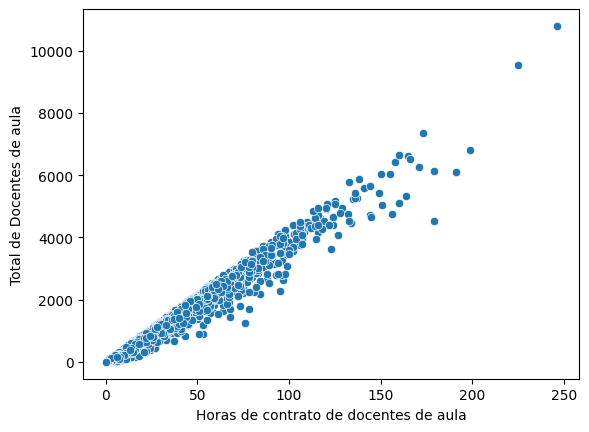

In [6]:
sns.scatterplot(df, x="DC_A", y="HH_A")
plt.xlabel("Horas de contrato de docentes de aula")
plt.ylabel("Total de Docentes de aula")
plt.show()

(c) Separe los datos en conjuntos de datos de entrenamiento y testeo. Luego ajuste el modelo de regresion.

In [7]:
entrenamiento= df[['DC_A', 'HH_A']]
#está bien con este tamaño?
train_set, test_set = train_test_split(entrenamiento, test_size=0.15)
train_set.describe()

,DC_A,HH_A
count,14155.000000,14155.000000
mean,13.863652,509.147934
std,19.895113,759.972808
min,0.000000,0.000000
25%,0.000000,0.000000
50%,5.000000,155.000000
75%,21.000000,755.000000
max,246.000000,10796.000000


In [10]:
from sklearn.linear_model import LinearRegression

X_train = train_set[['DC_A']]
y_train = train_set[['HH_A']]

modelo = LinearRegression()

modelo.fit(X_train, y_train)

LinearRegression()

(d) Muestre en una tabla los coeficientes obtenidos (Intercepto y pendiente). Interprete sus resultados.

In [9]:
intercepto= modelo.intercept_
pendiente= modelo.coef_

resultados = pd.DataFrame({
    'Coeficiente': ['Intercepto', 'Pendiente'],
    'Valor': [intercepto, pendiente]
})

resultados

,Coeficiente,Valor
0,Intercepto,[-15.983973600267575]
1,Pendiente,[[37.878323207866835]]


Podemos darno cuenta que la función modelada va decreciendo con un pendiente de -16,35 y corta el eje Y en el 37,92

(e) Visualize el modelo de regresion utilizando los coeficientes encontrados en el paso anterior.

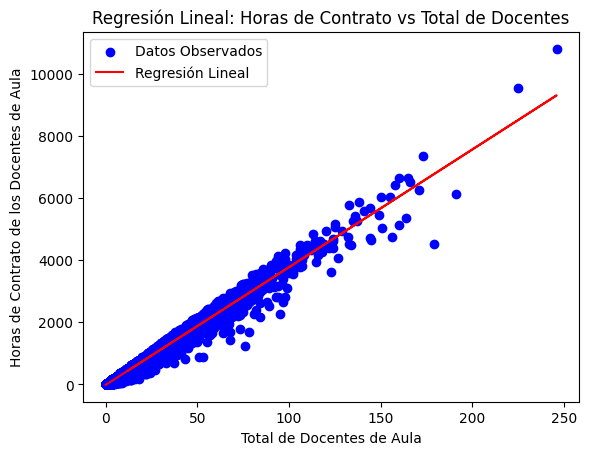

In [11]:
plt.scatter(X_train, y_train, color='blue', label='Datos Observados')
plt.plot(X_train, modelo.predict(X_train), color='red', label='Regresión Lineal')
plt.xlabel('Total de Docentes de Aula')
plt.ylabel('Horas de Contrato de los Docentes de Aula')
plt.title('Regresión Lineal: Horas de Contrato vs Total de Docentes')
plt.legend()
plt.show()

(f) Obtenga y comente el coeficiente de determinacion obtenido.

In [13]:
y_pred = modelo.predict(X_train)

# Calcular el coeficiente de determinación
r2 = r2_score(y_train, y_pred)

print(f"Coeficiente de determinación (R^2): {r2}")

Coeficiente de determinación (R^2): 0.9832822545536409


Que nos haya dado un valor de 0.98 sugiere que el modelo en cuestión explica el 98% de la variabilidad en la variable dependiente que es: Horas de Contrato de los Docentes de Aula, a partir de la variable independiente: Total de Docentes de Aula. Que hayamos obtenido un R^2 cercan a 1, indica que el modelo podra predecir con buena exactitud las Horas de Contrato de los Docentes de Aula en relación con el Total de Docentes de Aula.

(g) Evalue su modelo utilizando los datos del set de testeo. 
Para esto, calcule el MSE y RMSE predictivos
(error cuadratico medio y raız del error cuadratico medio). ¿Que significan los valores obtenidos?

In [14]:
#predecimos sobre los input
X_test = test_set[['DC_A']]
y_pred = modelo.predict(X_test)
y_pred

array([[-15.9839736 ],
       [ 21.89434961],
       [703.70416735],
       ...,
       [287.04261206],
       [-15.9839736 ],
       [-15.9839736 ]])

In [15]:
y_test = test_set[['HH_A']]
y_test

,HH_A
9374,0
632,10
4482,713
5273,0
12252,44
...,...
5474,0
9598,0
10668,290
14911,0


In [22]:
#error cuadratico medio
modelo_mse = mean_squared_error(y_test, y_pred)
print(f'El error cuadrático medio (MSE) es: {modelo_mse}.')

El error cuadrático medio (MSE) es: 7651.980832040391.


In [23]:
#raiz del error cuadratico medio
MODELO_RMSE= np.sqrt(modelo_mse)
print(f'La raíz del error cuadrático medio (RMSE) es: {MODELO_RMSE}.')

La raíz del error cuadrático medio (RMSE) es: 87.47560135283662.


#FALTA INTERPRETAR PQ ME DIO UNA COSA MUY GRANDE

**3.5 Pregunta 4 (clasificacion y validacion)**

En esta pregunta se le pide que implemente dos modelos de clasificacion: Support Vector Machine y Regresion
Logıstica. El objetivo es generar un modelo que prediga si la variable Horas de Contrato de los Docentes de Aula
(variable HH A) es mayor a 160 horas. Los modelos deben ser implementados usando validacion simple y K-Fold
Cross validation. Los pasos para responder la pregunta son:

1. Genere una nueva variable a partir de Horas de Contrato de los Docentes de Aula (variable HH A) que tome
el valor de 1 si supera las 160 horas, y tenga valor 0 si es menor o igual a este valor.

2. Seleccione la variable Total de Docentes de aula (variable DC A) y las tres mejores variables. Para escoger
estas variables usted debe justificar usando criterios claros y objetivos.

3. Genere un nuevo dataframe que contenga: la variable Total de Docentes de aula, las 3 variables que escogio
y la nueva variable generada

4. Con el data frame obtenido, aplique el modelo SVM utilizando la tecnica de validacion simple. Obtenga los
valores de las metricas: accuracy, recall, precision y f1 score. Explique como interpretarıa los resultados de
estas metricas.

5. Con el data frame obtenido, aplique el modelo Regresion Logıstica utilizando la tecnica de validacion simple.
Obtenga los valores de las metricas: accuracy, recall, precision y f1 score. Explique como interpretarıa los
resultados de estas metricas.

6. Mencione la principal deficiencia de aplicar validacion simple aplicada para este caso.

7. Con el data frame obtenido, aplique el modelo SVM utilizando la tecnica de validacion cruzada. Obtenga
los valores de las metricas: accuracy, recall, precision y f1 score. Determine si su modelo se encuentra sobre
entrenado.

8. Con el data frame obtenido, aplique el modelo Regresion Logıstica utilizando la tecnica de validacion cruzada.
Obtenga los valores de las metricas: accuracy, recall, precision y f1 score. Determine si su modelo se encuentra
sobre entrenado.